# 로지스틱회귀
---
1. 데이터프레임 생성

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
sns.set()
%matplotlib inline

In [2]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['species']=pd.Series(iris.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
sl_df=pd.DataFrame()
sl_df['sepal_length']=df['sepal length (cm)']
sl_df['species']=df['species']
sl_df.info()

sl_df=sl_df[:100]
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   species       150 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   species       100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [5]:
sl_df.describe()

,sepal_length,species
count,100.000000,100.000000
mean,5.471000,0.500000
std,0.641698,0.502519
min,4.300000,0.000000
25%,5.000000,0.000000
50%,5.400000,0.500000
75%,5.900000,1.000000
max,7.000000,1.000000


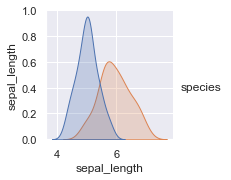

In [6]:
sns.pairplot(sl_df,hue='species')

---
2. 데이터 나누기

In [7]:
from sklearn.model_selection import train_test_split
xt,xv,yt,yv=train_test_split(sl_df.iloc[:,:1],sl_df.iloc[:,1:],test_size=.33)

---
3. 모델 인스턴스화

In [9]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

---
4. 학습

In [11]:
lr.fit(xt,yt)

C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

---
5. 그래프 생성

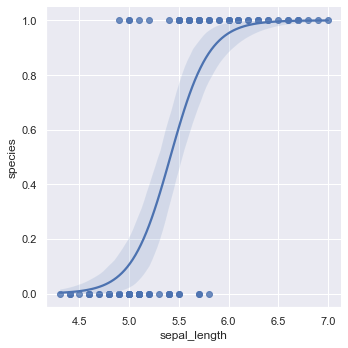

In [14]:
import seaborn as sns
sns.set()
sns.lmplot(x='sepal_length',y='species',data=sl_df,logistic=True)

---
6. 학습데이터 성능평가


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yt,lr.predict(xt)))
print(classification_report(yt,lr.predict(xt)))

[[30  2]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.96        35

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67



---
7. 테스트데이터 성능평가

In [16]:
print(confusion_matrix(yv,lr.predict(xv)))
print(classification_report(yv,lr.predict(xv)))

[[15  3]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.77      0.67      0.71        15

    accuracy                           0.76        33
   macro avg       0.76      0.75      0.75        33
weighted avg       0.76      0.76      0.76        33

